In [1]:
%matplotlib inline

In [2]:
import dask.dataframe as dd
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import shapely

In [51]:
import dask.array

In [26]:
import dask.distributed
client = dask.distributed.Client('localhost:8786')
client.restart()

<Client: scheduler='tcp://localhost:8786' processes=4 cores=4>

In [12]:
bike = dd.read_parquet('/bigdata/citibike.parquet')

In [6]:
bike.head(1)

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,start_taxizone_id,end_taxizone_id,start_ct_id,end_ct_id
0,634,2013-07-01,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970322,504,1 Ave & E 15 St,40.73222,-73.981659,16950,Customer,NaN,0,NaN,NaN,NaN,NaN


In [8]:
bike['trip_duration'].count().compute()

36902025

In [68]:
bike2 = bike2[
(((bike2.start_station_latitude - 40.70582).abs() < 0.21) &
((bike2.start_station_longitude + 73.9778002).abs() < 0.28)) &
(((bike2.end_station_latitude - 40.70582).abs() < 0.21 ) &
((bike2.end_station_longitude + 73.9778002).abs() < 0.28)) ]
# bike2 = bike2[bike2.start_station_longitude > (-74.05)]

In [11]:
bike2['trip_duration'].count().compute()

36902025

In [69]:
bike2['start_station_longitude'].count().compute()

36901863

In [70]:
lon = (dask.array.concatenate((bike2.start_station_longitude.values.astype(np.float32), bike2.end_station_longitude.values.astype(np.float32)))).compute()
lat = (dask.array.concatenate((bike2.start_station_latitude.values.astype(np.float32), bike2.end_station_latitude.values.astype(np.float32)))).compute()

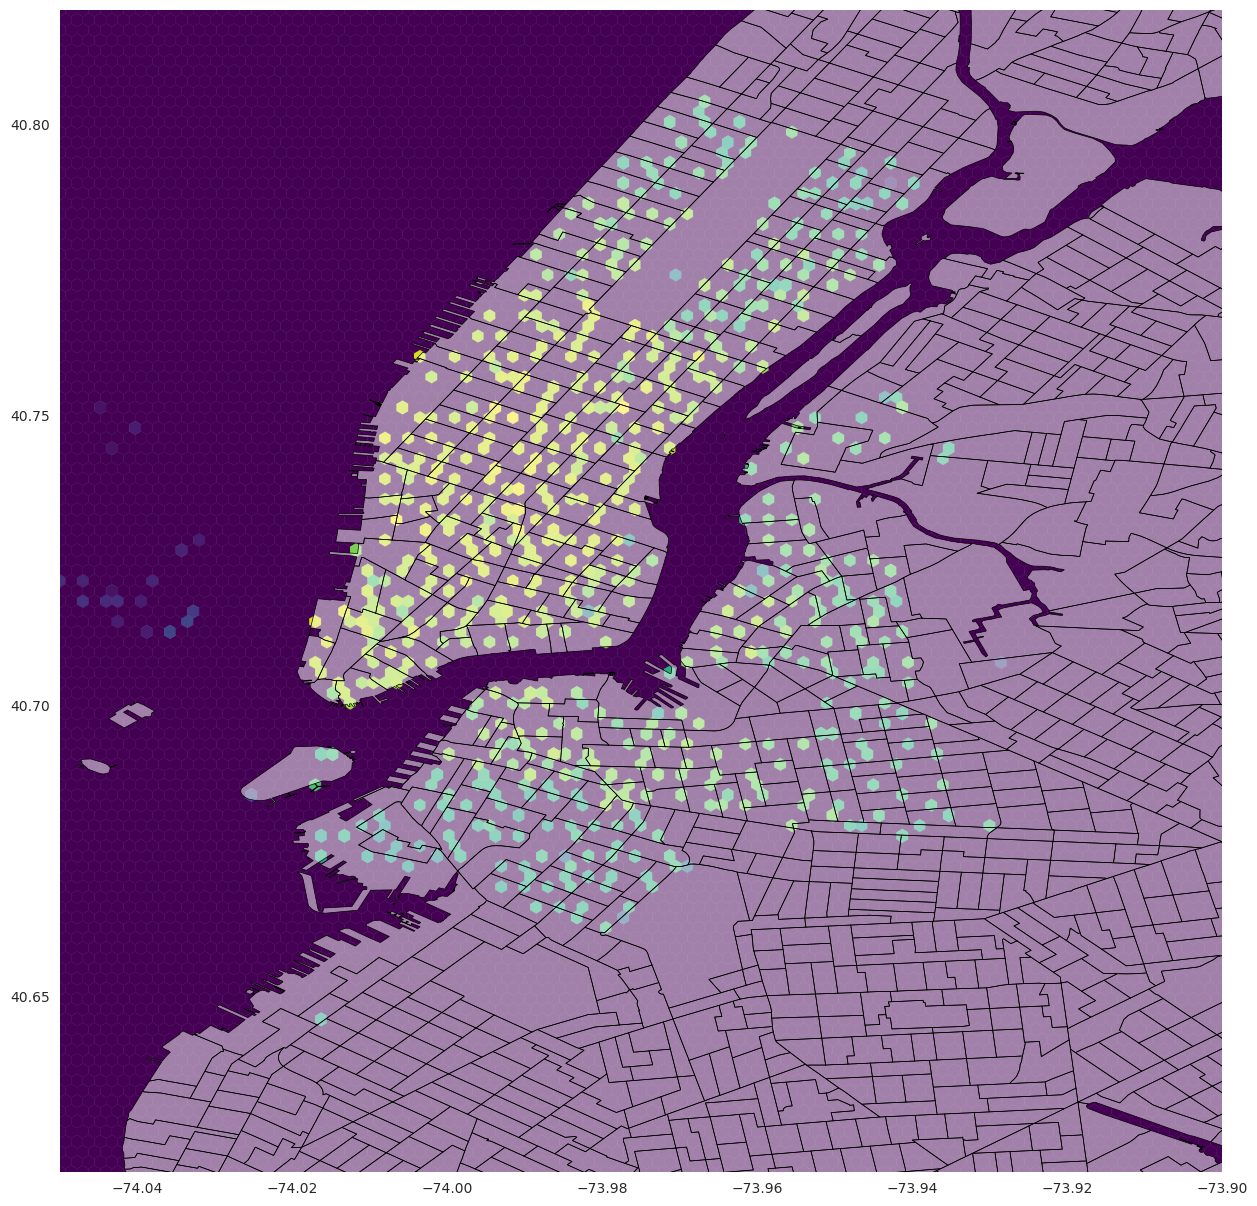

In [72]:
plt.hexbin(lon, lat, bins='log', cmap=plt.cm.viridis,
           extent=(-74.05, -73.9, 40.62, 40.82))
df_ct_latlon.plot(color='w', ax=plt.gca(), linewidth=0.5)
plt.xlim(-74.05, -73.9)
plt.ylim(40.62, 40.82)
plt.gcf().set_size_inches(15, 15)

In [65]:
df_ct = gpd.read_file('../shapefiles/nyct2010.shp')
df_tz = gpd.read_file('../shapefiles/taxi_zones.shp')
df_tz_latlon = df_tz.copy()
df_tz_latlon = df_tz_latlon.to_crs({'init': 'epsg:4326'})
df_ct_latlon = df_ct.copy()
df_ct_latlon = df_ct_latlon.to_crs({'init': 'epsg:4326'})

In [67]:
bike2 = dd.read_parquet('/bigdata/citibike.parquet', columns=[
                                                            'start_station_latitude',
                                                            'start_station_longitude',
                                                            'end_station_latitude',
                                                            'end_station_longitude',
                                                            'start_station_id',
    ])